<big><big><big><b> <center> ## Исламов Радмир ПИН-23

<big><big><big><b> <center> ## Варинат 15

<big><big><big><b> <center> ## Практикум 2.7. Дифференцирование функций многих переменных. Формула Тейлора <c>


<big><big><big><b> <center> ## Краткие теоретические сведения и практические упражнения

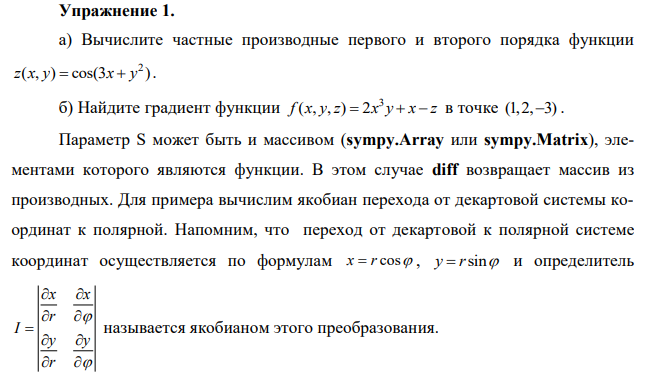

In [143]:
import sympy as sp
x, y = sp.symbols('x y')
z = sp.cos(3*x+y**2)
print('dzdx:')
sp.pprint(sp.diff(z, x))
print('\ndzdy:')
sp.pprint(sp.diff(z, y))
print('\nd2zdx2:')
sp.pprint(sp.diff(z, x, 2))
print('\nd2zdy2:')
sp.pprint(sp.diff(z, y, 2))

dzdx:
      ⎛       2⎞
-3⋅sin⎝3⋅x + y ⎠

dzdy:
        ⎛       2⎞
-2⋅y⋅sin⎝3⋅x + y ⎠

d2zdx2:
      ⎛       2⎞
-9⋅cos⎝3⋅x + y ⎠

d2zdy2:
   ⎛   2    ⎛       2⎞      ⎛       2⎞⎞
-2⋅⎝2⋅y ⋅cos⎝3⋅x + y ⎠ + sin⎝3⋅x + y ⎠⎠


In [144]:
x, y, z = sp.symbols('x y z')
f = 2*(x**3)*y+x-z
dfdx = sp.diff(f, x)
dfdy = sp.diff(f, y)
dfdz = sp.diff(f, z)

V = dfdx * x + dfdy * y + dfdz * z
V = V.subs(x, 1)
V = V.subs(y, 2)
V = V.subs(z, -3)
sp.pprint(V)

20


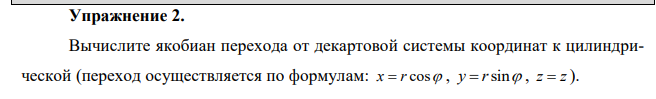

In [145]:
r, t, z = sp.symbols('r t z')
# формулы перехода от декартовой системы координат к полярной
x = r * sp.cos(t)
y = r * sp.sin(t)
z = z
# вектор функций перехода для составления матрицы
A = sp.Matrix([[x, y, z]])
#sp.pprint(A)
B = sp.Matrix([[sp.diff(A,r)], [sp.diff(A,t)], [sp.diff(A,z)]])
#sp.pprint(B.T)

# вычисление якобиана
print("\nI:")
sp.pprint(sp.simplify(B.det())) # упрощение выражения с помощью simplify



I:
r


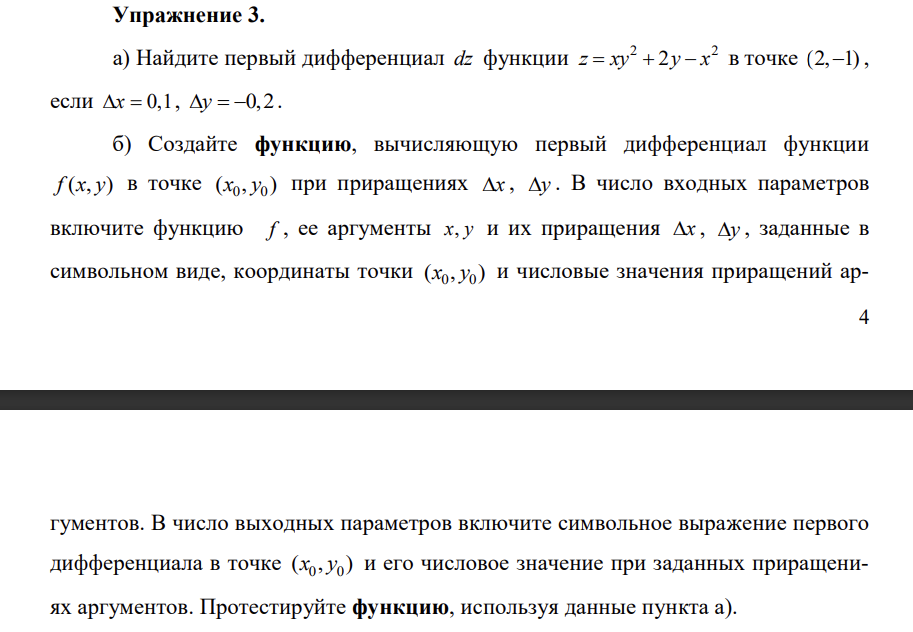

In [146]:
x, y = sp.symbols('x y')
z = x*y**2 + 2*y - x**2
dfdx = sp.diff(z, x)
dfdy = sp.diff(z, y)
dx = 0.1
dy = -0.2
dz = dfdx * dx + dfdy * dy
dz = dz.subs(x, 2)
dz = dz.subs(y, -1)

print('\nRes:')
sp.pprint(dz)


Res:
0.100000000000000


In [147]:
def diff_func(f, dx, dy, x0, y0):
    z = eval(f)
    dfdx = sp.diff(z, x)
    dfdy = sp.diff(z, y)
    dz = dfdx * dx + dfdy * dy
    dz = dz.subs(x, x0)
    dz = dz.subs(y, y0)
    return dz
sp.pprint(diff_func('x*y**2 + 2*y - x**2', 0.1, -0.2, 2, -1) == dz)

True


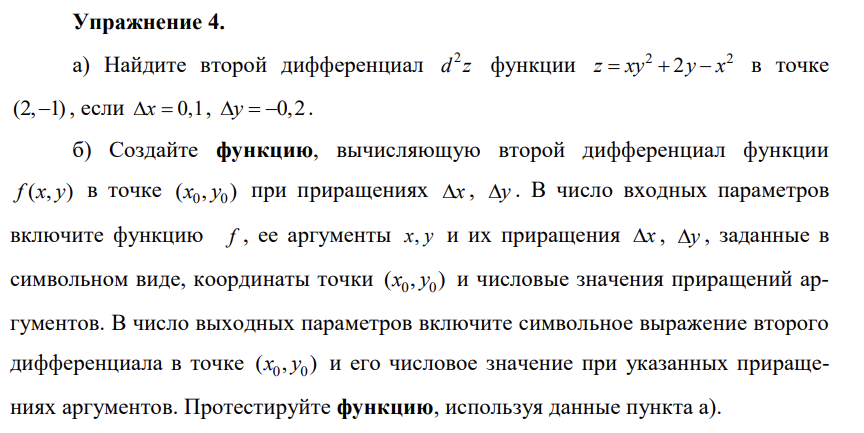

In [148]:
def diff2_func(f, dx, dy, x0, y0):
    z = eval(f)
    d2fdx2 = sp.diff(z, x, 2)
    d2fdy2 = sp.diff(z, y, 2)
    d2fdxdy = sp.diff(sp.diff(z, x), y)
    dz = d2fdx2 * dx**2 + 2 * d2fdxdy * dx * dy + d2fdy2 * dy**2
    dz = dz.subs(x, x0)
    dz = dz.subs(y, y0)
    return dz
sp.pprint(diff2_func('x*y**2 + 2*y - x**2', 0.1, -0.2, 2, -1))

0.220000000000000


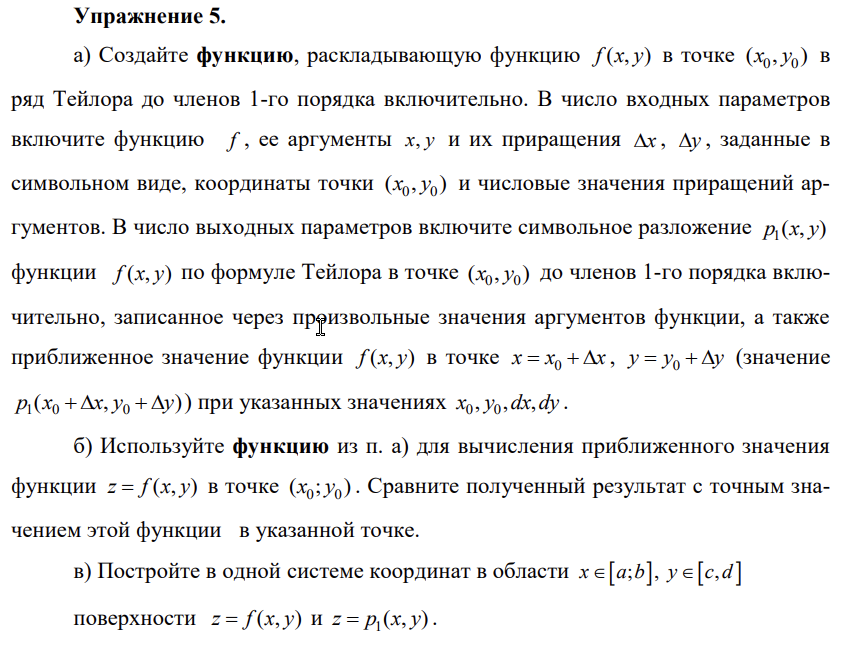

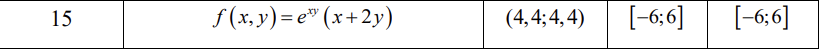

In [149]:

def Taylor_decompose(f, dx, dy, x0, y0):
    x, y = sp.symbols('x y')
    f_dec = f + sp.diff(f, x)*(x - x0) + sp.diff(f, y)*(y - y0)
    value = f_dec.subs([(x, x0 + dx), (y, y0 + dy)])
    return f_dec, value


f = np.e**(x*y)*(x + 2*y)
dx = 0.1
dy = 0.2
x0 = 4.4
y0 = 4.4
gen, value = Taylor_decompose(f,dx, dy, x0, y0)

print(f'RES: {gen}')
print(f'\nValue: {value}')

RES: 2.71828182845905**(x*y)*(x + 2*y) + (x - 4.4)*(1.0*2.71828182845905**(x*y)*y*(x + 2*y) + 2.71828182845905**(x*y)) + (y - 4.4)*(1.0*2.71828182845905**(x*y)*x*(x + 2*y) + 2*2.71828182845905**(x*y))

Value: 32076953494.3491


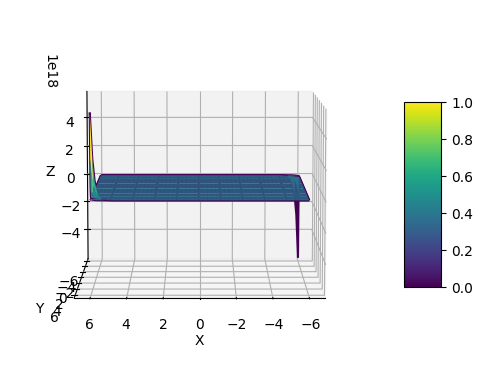

In [150]:
def f(x, y):
    return np.e**(x*y)*(x + 2*y)
def dec_f(x, y):
    return 2.71828182845905**(x*y)*(x + 2*y) + (x - 0.1)*(1.0*2.71828182845905**(x*y)*y*(x + 2*y) + 2.71828182845905**(x*y)) + (y - 0.2)*(1.0*2.71828182845905**(x*y)*x*(x + 2*y) + 2*2.71828182845905**(x*y))
def plot_3d(f, Decf, a, b):
    x_min, x_max = a, b
    y_min, y_max = a, b

    X, Y = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Вычисление значений функции на сетке точек
    Z = f(X, Y)
    ZDec = Decf(X,Y)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    wf = ax.plot_wireframe(X, Y, Z, rstride = 10, cstride = 10, color = 'red')
    wf1 = ax.plot_wireframe(X, Y, ZDec, rstride = 10, cstride = 10, color = 'cyan')
    wf.set_edgecolors(wf.to_rgba(wf._A))
    wf1.set_edgecolors(wf1.to_rgba(wf1._A))
    surf1 = ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0)
    surf2 = ax.plot_surface(X, Y, ZDec, cmap='viridis', linewidth=0)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    fig.colorbar(wf, shrink=0.5, aspect=5)
    ax.view_init(7, 90)
    plt.show()
plot_3d(f, dec_f, -6, 6)

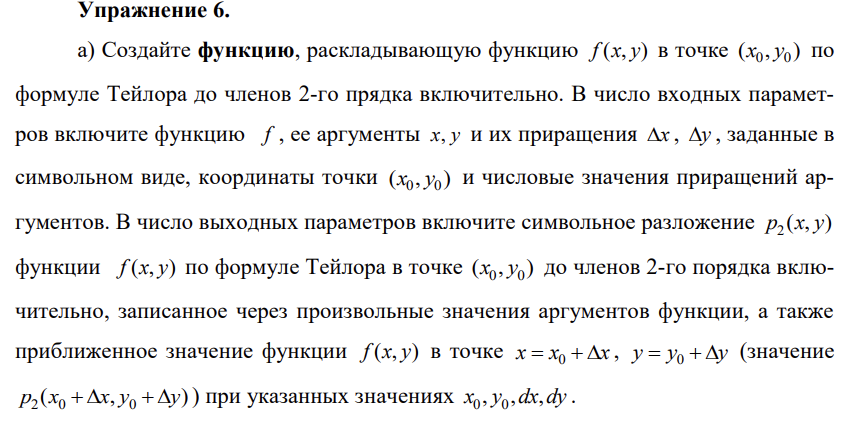

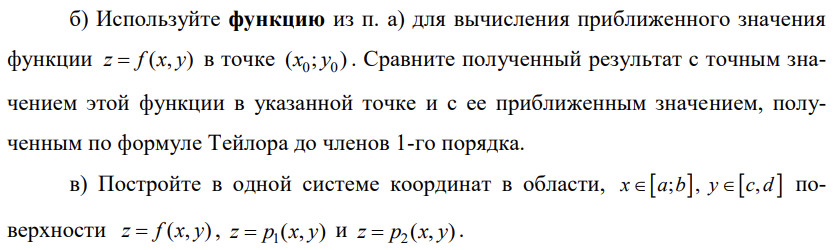

In [151]:

def Taylor_decompose2(f, dx, dy, x0, y0):
    x, y = sp.symbols('x y')
    f_dec = f + sp.diff(f, x)*(x - x0) + sp.diff(f, y)*(y - y0) +  (sp.diff(f, x)*(x - x0)**2 + sp.diff(f, y)*(y - y0)**2)/2
    value = f_dec.subs([(x, x0 + dx), (y, y0 + dy)])
    return f_dec, value


f = np.e**(x*y)*(x + 2*y)
dx = 0.1
dy = 0.2
x0 = 4.4
y0 = 4.4
gen, value = Taylor_decompose2(f,dx, dy, x0, y0)

print(f'RES: {gen}')
print(f'\nValue: {value}')

RES: 2.71828182845905**(x*y)*(x + 2*y) + 9.68*(0.227272727272727*x - 1)**2*(1.0*2.71828182845905**(x*y)*y*(x + 2*y) + 2.71828182845905**(x*y)) + (x - 4.4)*(1.0*2.71828182845905**(x*y)*y*(x + 2*y) + 2.71828182845905**(x*y)) + 9.68*(0.227272727272727*y - 1)**2*(1.0*2.71828182845905**(x*y)*x*(x + 2*y) + 2*2.71828182845905**(x*y)) + (y - 4.4)*(1.0*2.71828182845905**(x*y)*x*(x + 2*y) + 2*2.71828182845905**(x*y))

Value: 33633416536.8639


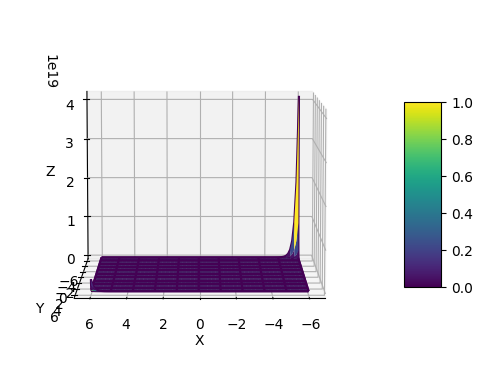

In [152]:
def f(x, y):
    return np.e**(x*y)*(x + 2*y)
def dec_f(x, y):
    return 2.71828182845905**(x*y)*(x + 2*y) + 9.68*(0.227272727272727*x - 1)**2*(1.0*2.71828182845905**(x*y)*y*(x + 2*y) + 2.71828182845905**(x*y)) + (x - 4.4)*(1.0*2.71828182845905**(x*y)*y*(x + 2*y) + 2.71828182845905**(x*y)) + 9.68*(0.227272727272727*y - 1)**2*(1.0*2.71828182845905**(x*y)*x*(x + 2*y) + 2*2.71828182845905**(x*y)) + (y - 4.4)*(1.0*2.71828182845905**(x*y)*x*(x + 2*y) + 2*2.71828182845905**(x*y))
plot_3d(f, dec_f, -6, 6)

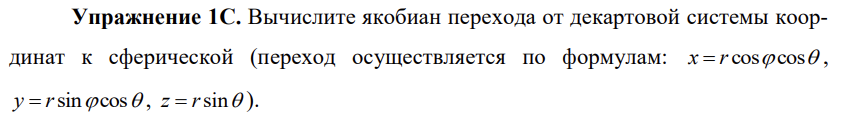

In [153]:
r, t, O, z = sp.symbols('r t O z')
# формулы перехода от декартовой системы координат к полярной
x = r * sp.cos(O) * sp.cos(t)
y = r * sp.cos(O) * sp.sin(t)
z = r * sp.sin(O)
# вектор функций перехода для составления матрицы
A = sp.Matrix([[x, y, z]])
#sp.pprint(A)
B = sp.Matrix([[sp.diff(A,r)], [sp.diff(A,t)], [sp.diff(A,O)]])
#sp.pprint(B.T)

# вычисление якобиана
print("\nI:")
sp.pprint(sp.simplify(B.det())) # упрощение выражения с помощью simplify



I:
 2       
r ⋅cos(O)


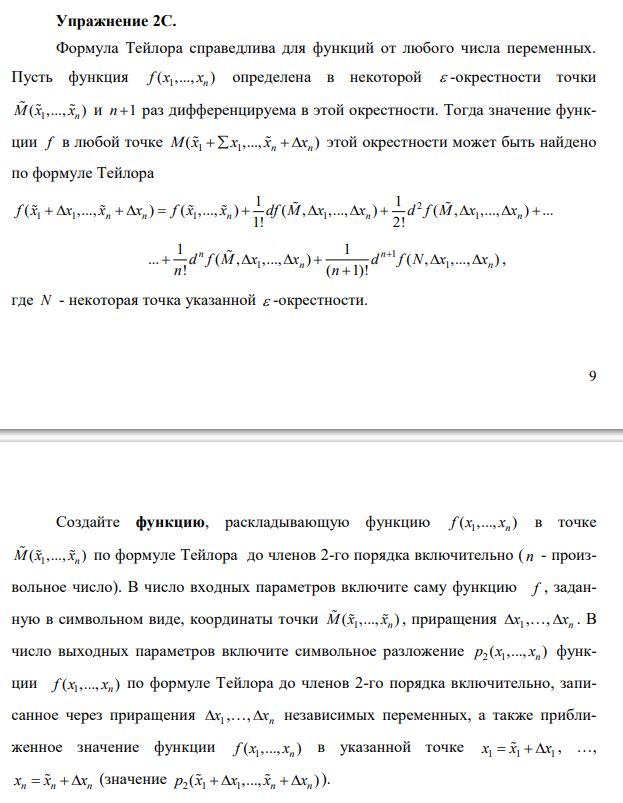

In [2]:
import sympy

def taylor_2nd_order(f_str, m_str, delta_str):
    # Парсим входные параметры
    f = sympy.sympify(f_str)
    m = tuple(map(sympy.sympify, m_str.split(',')))
    delta = tuple(map(sympy.sympify, delta_str.split(',')))

    # Создаем символьные переменные
    vars = sympy.symbols('x:%d' % len(m))

    # Создаем точку M и точку M + delta
    m_point = dict(zip(vars, m))
    m_delta_point = dict(zip(vars, [mi + di for mi, di in zip(m, delta)]))

    # Вычисляем ряд Тейлора до 2-го порядка
    taylor_series = f.series(vars, m_point, 2).removeO()

    # Подставляем значения delta в ряд Тейлора
    taylor_series_delta = taylor_series.subs(m_point, m_delta_point)

    return taylor_series, taylor_series_delta

In [3]:
f_str = 'x**2 + y**2'
m_str = '1, 2'
delta_str = '0.1, 0.2'

taylor_series, taylor_series_delta = taylor_2nd_order(f_str, m_str, delta_str)

print('p2(x, y) =', taylor_series)
print('f(x+Δx, y+Δy) =', taylor_series_delta)

p2(x, y) = x**2 + y**2
f(x+Δx, y+Δy) = x**2 + y**2


<big><big><big><b> <center> ## Задания для самостоятельной работы 

<big><big><b> 1) Для символьного вычисления производных функций двух переменных в библиотеке SymPy можно использовать функцию `diff`. Вот примеры использования:

- Производная функции f(x, y) по переменной x:
  `diff(f, x)`

- Производная функции f(x, y) по переменной y:
  `diff(f, y)`

<big><big><b> Таким образом, с помощью функции `diff` можно вычислять производные функции двух переменных.

<big><big><b> Для вычисления производных функций трех переменных можно использовать аналогичный подход. Примеры:

- Производная функции f(x, y, z) по переменной x:
  `diff(f, x)`

- Производная функции f(x, y, z) по переменной y:
  `diff(f, y)`

- Производная функции f(x, y, z) по переменной z:
  `diff(f, z)`

<big><big><b> 2) Чтобы вычислить вторую смешанную производную функции двух переменных с использованием SymPy, можно применить функцию `diff` дважды, указывая соответствующие переменные. Вот пример:

- Вторая смешанная производная функции f(x, y) по переменным x и y:
  `diff(diff(f, x), y)`

<big><big><b> В данном примере сначала вычисляется частная производная по переменной x, а затем по полученному результату вычисляется частная производная по переменной y.